## Heart_Disease_Dimensionality _Reduction (Pricipal Component Analysis)

1. Load heart disease dataset in pandas dataframe
1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
1. Convert text columns to numbers using label encoding and one hot encoding
1. Apply scaling
1. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
1. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\heart.csv')
dataset.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [105]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [106]:
dataset.shape

(918, 12)

In [107]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

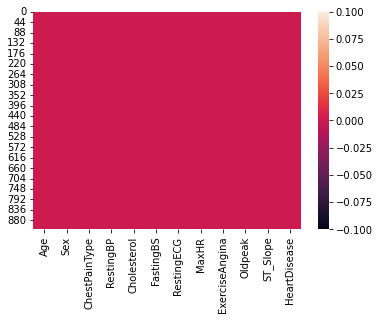

In [108]:
sns.heatmap(data=dataset.isnull())
plt.show()

### Remove outliers using Z score

In [109]:
# Calculate z-score for multiple columns
cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
z_scores = (dataset[cols] - dataset[cols].mean()) / dataset[cols].std()

# Set threshold for outlier removal
threshold = 3

# Keep only rows where all selected columns have z-score within threshold
dataset = dataset[(abs(z_scores) <= threshold).all(axis=1)]

In [110]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,132.027809,198.005562,0.232481,136.917686,0.861513,0.547275
std,9.456073,17.120895,107.157779,0.422649,25.356740,1.007626,0.498037
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


In [111]:
dataset.shape

(899, 12)

In [112]:
dataset = dataset.reset_index(drop=True)

### Convert text columns to numbers using label encoding and one hot encoding

In [113]:
dataset.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [114]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [115]:
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [116]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [117]:
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [118]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

### One Hot Encoding

In [119]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(dataset[['Sex','ExerciseAngina']]).toarray()
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
print(encoded_features.columns)

Index(['Sex_M', 'ExerciseAngina_Y'], dtype='object')


In [120]:
#renaming the columns for better after one hot encoding
encoded_features.rename(columns={
    'Sex_M': 'Sex',
    'ExerciseAngina_Y': 'ExerciseAngina',
}, inplace=True)
print(encoded_features.head())

   Sex  ExerciseAngina
0  1.0             0.0
1  0.0             0.0
2  1.0             0.0
3  0.0             1.0
4  1.0             0.0


In [121]:
# Drop only if columns exist
columns_to_drop = [col for col in ['Sex','ExerciseAngina'] if col in dataset.columns]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
dataset = pd.concat([dataset, encoded_features], axis=1)
dataset.head(2)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,1.0,0.0
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,0.0,0.0


### Label Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode 'Marital Status'
dataset['ChestPainType_encod'] = label_encoder.fit_transform(dataset['ChestPainType'])
dataset['ST_Slope_encod'] = label_encoder.fit_transform(dataset['ST_Slope'])
dataset['RestingECG_encod'] = label_encoder.fit_transform(dataset['RestingECG'])
dataset.head(2)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina,ChestPainType_encod,ST_Slope_encod,RestingECG_encod
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,1.0,0.0,1,2,1
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,0.0,0.0,2,1,1


In [123]:
dataset.drop(['ChestPainType','RestingECG','ST_Slope'],axis=1,inplace=True)

In [124]:
dataset.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ExerciseAngina,ChestPainType_encod,ST_Slope_encod,RestingECG_encod
0,40,140,289,0,172,0.0,0,1.0,0.0,1,2,1
1,49,160,180,0,156,1.0,1,0.0,0.0,2,1,1


### Data Divide in x and y

In [125]:
# Separate features and target first
x = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']

### Apply Scaling 

In [126]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Apply scaling only to features
# x[numerical_cols.drop('HeartDisease')] = scaler.fit_transform(x[numerical_cols.drop('HeartDisease')])

# # Check
# print(y.unique())  # Should output: [0, 1]

scaler = StandardScaler()
x= scaler.fit_transform(x)

In [127]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ExerciseAngina,ChestPainType_encod,ST_Slope_encod,RestingECG_encod
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,132.027809,198.005562,0.232481,136.917686,0.861513,0.547275,0.789766,0.403782,0.785317,1.373749,0.991101
std,9.456073,17.120895,107.157779,0.422649,25.356740,1.007626,0.498037,0.407701,0.490928,0.956496,0.601057,0.629569
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000


### Split data in Train-Test

In [128]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.20,random_state=42)

### Model Selection Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [130]:
print("Train Score:", lr.score(x_train, y_train) * 100)
print(f"Test Score: {lr.score(x_test, y_test) * 100:.2f}")

Train Score: 85.67454798331016
Test Score: 85.56


In [131]:
lr.predict([[40,140,289,0,172,0.0,1.0,0.0,1,2,1]]) #40,140,289,0,172,0.0,1.0,0.0,1,2,1 =0

array([0], dtype=int64)

### Model Selection Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


RandomForestClassifier()

In [133]:
print("Train Score:", model_rf.score(x_train, y_train) * 100)
print(f"Test Score: {model_rf.score(x_test, y_test) * 100:.2f}")

Train Score: 100.0
Test Score: 89.44


In [134]:
model_rf.predict([[40,140,289,0,172,0.0,1.0,0.0,1,2,1]]) #40,140,289,0,172,0.0,1.0,0.0,1,2,1 =0

array([0], dtype=int64)

In [135]:

model_rf.predict([[48,138,214,0,108,1.5,0.0,1.0,0,1,1]]) #48,138,214,0,108,1.5,0.0,1.0,0,1,1=1

array([0], dtype=int64)

### Model Selection SVM

In [136]:
from sklearn.svm import SVC
svc_model = SVC(kernel="linear")
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [137]:
print("Train Score:", svc_model.score(x_train, y_train) * 100)
print(f"Test Score: {svc_model.score(x_test, y_test) * 100:.2f}")

Train Score: 86.23087621696801
Test Score: 86.11


In [138]:
model_rf.predict([[40,140,289,0,172,0.0,1.0,0.0,1,2,1]]) #40,140,289,0,172,0.0,1.0,0.0,1,2,1 =0

array([0], dtype=int64)

In [139]:
print(f"\n📊 Model Accuracies without PCA:")
print(f"Random Forest Accuracy: {model_rf.score(x_test, y_test)*100:.4f}")
print(f"Logistic Regression Accuracy: {lr.score(x_test, y_test)*100:.4f}")
print(f"SVM Accuracy: {svc_model.score(x_test, y_test)*100:.4f}")


📊 Model Accuracies without PCA:
Random Forest Accuracy: 89.4444
Logistic Regression Accuracy: 85.5556
SVM Accuracy: 86.1111


# PCA

In [140]:
from sklearn.decomposition import PCA
pca =PCA(n_components=10)
x_pca =pca.fit_transform(x)
x_pca.shape

(899, 10)

In [141]:
pca.explained_variance_ratio_

array([0.25482334, 0.13002748, 0.10589196, 0.09194049, 0.07973011,
       0.07757658, 0.07225475, 0.05518227, 0.05033944, 0.04467153])

In [142]:
x_train_pca ,x_test_pca ,y_train,y_test =train_test_split(x_pca,y,test_size=0.20,random_state=42)

### Model Selection SVM with PCA

In [143]:
from sklearn.svm import SVC
svc_model_pca = SVC(kernel="linear")
svc_model_pca.fit(x_train_pca, y_train)

SVC(kernel='linear')

In [144]:
print(f"Train Score: {svc_model_pca.score(x_train_pca, y_train) * 100:.2f}")
print(f"Test Score: {svc_model_pca.score(x_test_pca, y_test) * 100:.2f}")

Train Score: 85.40
Test Score: 86.67


In [145]:
svc_model_pca.predict([[48,138,214,0,108,1.5,0.0,1.0,0,1]]) #48,138,214,0,108,1.5,0.0,1.0,0,1=1

array([0], dtype=int64)

### Model Selection Logistice Regression with PCA

In [146]:
from sklearn.linear_model import LogisticRegression
lr_model_pca=LogisticRegression()
lr_model_pca.fit(x_train_pca,y_train)

LogisticRegression()

In [147]:
print(f"Train Score: {lr_model_pca.score(x_train_pca, y_train) * 100:.2f}")
print(f"Test Score: {lr_model_pca.score(x_test_pca, y_test) * 100:.2f}")

Train Score: 84.70
Test Score: 85.56


### Model Selection Random Forest Classifier with PCA

In [148]:
from sklearn.ensemble import RandomForestClassifier

model_rf_pca = RandomForestClassifier()
model_rf_pca.fit(x_train_pca, y_train)

RandomForestClassifier()

In [149]:
print(f"Train Score: {model_rf_pca.score(x_train_pca, y_train) * 100:.2f}")
print(f"Test Score: {model_rf_pca.score(x_test_pca, y_test) * 100:.2f}")

Train Score: 100.00
Test Score: 83.89


### Final Result Comparison

In [150]:
print(f"\n📊 Model Accuracies without PCA:")
print(f"Random Forest Accuracy: {model_rf.score(x_test, y_test)*100:.4f}")
print(f"Logistic Regression Accuracy: {lr.score(x_test, y_test)*100:.4f}")
print(f"SVM Accuracy: {svc_model.score(x_test, y_test)*100:.4f}")


📊 Model Accuracies without PCA:
Random Forest Accuracy: 89.4444
Logistic Regression Accuracy: 85.5556
SVM Accuracy: 86.1111


In [151]:
print(f"\n📊 Model Accuracies with PCA:")
print(f"Random Forest Accuracy: {model_rf_pca.score(x_test_pca, y_test) * 100:.4f}")
print(f"Logistic Regression Accuracy: {lr_model_pca.score(x_test_pca, y_test) * 100:.4f}")
print(f"SVM Accuracy: {svc_model_pca.score(x_test_pca, y_test) * 100:.4f}")


📊 Model Accuracies with PCA:
Random Forest Accuracy: 83.8889
Logistic Regression Accuracy: 85.5556
SVM Accuracy: 86.6667
